In [52]:
# Dependencies and Setup
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets.embed import embed_minimal_html

import requests
import json

import time # use for annotating the date of the API pull in graphics using '.now'

import openbrewerydb # a wrapper for accessing the Open Brewery DB API

import gmaps
import gmaps.datasets

import gmaps.geojson_geometries

import seaborn as sns

from matplotlib.cm import viridis
from matplotlib.colors import to_hex

#config
from config import api_key
from config_1 import api_key

from pprint import pprint

gmaps.configure(api_key=api_key)
#print(api_key) # comment out before saving or uploading to github

In [53]:
# Store filepath in a variable
file_one = "census_data_by_zip.csv"

In [17]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
file_one_in = pd.read_csv('census_data_by_zip.csv', dtype=str)
#file_one_df["postal_code"]=file_one_df["postal_code"].astype(str)
# Show just the header
file_one_in.head()

,postal_code,Population,Median Age,Household Income,Per Capita Income,Number of Males,Number of Females
0,08518,5217.0,41.5,74286.0,33963.0,2539.0,2678.0
1,08520,27468.0,37.4,90293.0,37175.0,14319.0,13149.0
2,08525,4782.0,47.1,118656.0,59848.0,2325.0,2457.0
3,08527,54867.0,42.2,88588.0,37021.0,26774.0,28093.0
4,08528,245.0,48.5,58676.0,49117.0,120.0,125.0


In [18]:
file_one_in["Household Income"]=file_one_in["Household Income"].astype(float)
file_one_in["Median Age"]=file_one_in["Median Age"].astype(str)
file_one_df = file_one_in[(file_one_in["Household Income"]>0)]
file_one_df.head()

,postal_code,Population,Median Age,Household Income,Per Capita Income,Number of Males,Number of Females
0,08518,5217.0,41.5,74286.0,33963.0,2539.0,2678.0
1,08520,27468.0,37.4,90293.0,37175.0,14319.0,13149.0
2,08525,4782.0,47.1,118656.0,59848.0,2325.0,2457.0
3,08527,54867.0,42.2,88588.0,37021.0,26774.0,28093.0
4,08528,245.0,48.5,58676.0,49117.0,120.0,125.0


In [19]:
brewery_data_df = openbrewerydb.load(state=None)
brewery_data_df["postal_code"]= brewery_data_df["postal_code"].str.split("-", n = 1, expand = True) 
brewery_data_df

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,tag_list,updated_at,website_url
0,micro,Birmingham,United States,2,33.524521,-86.774322,Avondale Brewing Co,2057775456,35222,Alabama,201 41st St S,[],2018-08-23T23:19:57.825Z,http://www.avondalebrewing.com
1,micro,Tuscaloosa,United States,4,33.198491,-87.562155,Band of Brothers Brewing Company,2052665137,35401,Alabama,1605 23rd Ave,[],2018-08-23T23:19:59.462Z,http://www.bandofbrosbrewing.com
2,micro,Birmingham,United States,44,33.512849,-86.791400,Trim Tab Brewing,2057030536,35233,Alabama,2721 5th Ave S,[],2018-08-23T23:20:31.423Z,http://www.trimtabbrewing.com
3,micro,Huntsville,United States,46,34.727752,-86.593201,Yellowhammer Brewery,2569755950,35805,Alabama,2600 Clinton Ave W,[],2018-08-23T23:20:33.102Z,http://www.yellowhammerbrewery.com
4,micro,Wasilla,United States,55,61.575269,-149.412710,Bearpaw River Brewing Co,,99654,Alaska,4605 E Palmer Wasilla Hwy,[],2018-08-23T23:20:40.743Z,http://bearpawriverbrewing.com
5,micro,Anchorage,United States,76,61.138489,-149.879076,King Street Brewing Co,9073365464,99515,Alaska,9050 King Street,[],2018-08-23T23:20:57.179Z,http://www.kingstreetbrewing.com
6,micro,Tucson,United States,94,32.246737,-110.992751,1912 Brewing,5202564851,85745,Arizona,2045 N Forbes Blvd Ste 105,[],2018-08-23T23:21:11.302Z,http://www.1912brewing.com
7,contract,Scottsdale,United States,98,33.497262,-111.924474,Bad Water Brewing,5207459175,85251,Arizona,4216 N Brown Ave,[],2018-08-23T23:21:15.169Z,http://www.badwaterbrewing.com
8,brewpub,Chandler,United States,104,33.305346,-111.911126,BJs Restaurant & Brewery - Chandler,4809170631,85226,Arizona,3155 W Chandler Blvd,[],2018-08-23T23:21:21.165Z,http://www.bjsrestaurants.com
9,micro,Tucson,United States,107,32.201608,-110.821779,BlackRock Brewers,5202073203,85710,Arizona,1664 S Research Loop Ste 200,[],2018-08-23T23:21:23.794Z,http://www.brb.beer


In [20]:
print(brewery_data_df.columns)

Index(['brewery_type', 'city', 'country', 'id', 'latitude', 'longitude',
       'name', 'phone', 'postal_code', 'state', 'street', 'tag_list',
       'updated_at', 'website_url'],
      dtype='object')


In [21]:
# Merge two dataframes using an inner join
merge_table = pd.merge(file_one_df, brewery_data_df, on="postal_code")
merge_table["Population"]=merge_table["Population"].astype(float)
merge_table["Median Age"]=merge_table["Median Age"].astype(float)
merge_table["Household Income"]=merge_table["Household Income"].astype(float)
merge_table.to_csv("Output/Joined_File_DB.csv", index=False, header=True)
merge_table.count()

postal_code          7870
Population           7870
Median Age           7870
Household Income     7870
Per Capita Income    7870
Number of Males      7870
Number of Females    7870
brewery_type         7870
city                 7870
country              7870
id                   7870
latitude             4719
longitude            4719
name                 7870
phone                7870
state                7870
street               7870
tag_list             7870
updated_at           7870
website_url          7870
dtype: int64

In [22]:
city_population = merge_table.groupby(["city"]).agg(
                            {"Population":"mean", 
                             "Household Income":"mean",
                             "Median Age":"mean"})

city_population

,Population,Household Income,Median Age
city,,,
Abbottstown,3501.000000,61607.000000,40.700000
Aberdeen,24299.000000,45182.250000,37.925000
Abilene,25049.500000,44612.750000,33.000000
Abingdon,16239.000000,39229.000000,44.700000
Abington,16009.000000,78395.000000,38.700000
Accord,3435.000000,67639.000000,42.600000
Acton,21804.000000,109578.000000,41.900000
Ada,19366.000000,118761.000000,39.300000
Adamstown,2902.500000,73526.500000,40.850000


In [23]:
city_population_mean = merge_table.groupby(["city"]).agg(
                            {"Population":sum, 
                             "Household Income":"mean",
                             "Median Age":"mean"})

city_population_mean

,Population,Household Income,Median Age
city,,,
Abbottstown,3501.0,61607.000000,40.700000
Aberdeen,97196.0,45182.250000,37.925000
Abilene,100198.0,44612.750000,33.000000
Abingdon,16239.0,39229.000000,44.700000
Abington,16009.0,78395.000000,38.700000
Accord,3435.0,67639.000000,42.600000
Acton,43608.0,109578.000000,41.900000
Ada,19366.0,118761.000000,39.300000
Adamstown,5805.0,73526.500000,40.850000


In [24]:
number_breweries = merge_table.groupby(["city"])[["postal_code"]].count()
number_breweries
number_breweries_index = number_breweries.reset_index()
#number_breweries_index.sort_values(["postal_code"], ascending = False)
#number_breweries_index.to_csv("Output/city_index.csv", index=False, header=True)

In [25]:
# Merge two dataframes using an inner join
total_brewery_info = pd.merge(city_population, number_breweries, on="city")
total_brewery_info_df = total_brewery_info.rename(columns={"postal_code":"Number of Breweries in City"})
total_brewery_info_final = total_brewery_info_df.reset_index()
total_brewery_info_final.to_csv("Output/total_brewery_info_df.csv", index=False, header=True)
total_brewery_info_final

,city,Population,Household Income,Median Age,Number of Breweries in City
0,Abbottstown,3501.000000,61607.000000,40.700000,1
1,Aberdeen,24299.000000,45182.250000,37.925000,4
2,Abilene,25049.500000,44612.750000,33.000000,4
3,Abingdon,16239.000000,39229.000000,44.700000,1
4,Abington,16009.000000,78395.000000,38.700000,1
5,Accord,3435.000000,67639.000000,42.600000,1
6,Acton,21804.000000,109578.000000,41.900000,2
7,Ada,19366.000000,118761.000000,39.300000,1
8,Adamstown,2902.500000,73526.500000,40.850000,2
9,Addison,13214.000000,57633.000000,32.200000,2


In [26]:
# Create the bins in which Data will be held
# Bins are 0, 59, 69, 79, 89, 100.   
bins = [0, 3, 24, 200]

# Create the names for the bins
group_names = ["Entry", "Up and Coming", "Mature"]

total_brewery_info_final["Market Segment Counts"] = pd.cut(total_brewery_info_final["Number of Breweries in City"], bins, labels=group_names)
total_brewery_info_final

,city,Population,Household Income,Median Age,Number of Breweries in City,Market Segment Counts
0,Abbottstown,3501.000000,61607.000000,40.700000,1,Entry
1,Aberdeen,24299.000000,45182.250000,37.925000,4,Up and Coming
2,Abilene,25049.500000,44612.750000,33.000000,4,Up and Coming
3,Abingdon,16239.000000,39229.000000,44.700000,1,Entry
4,Abington,16009.000000,78395.000000,38.700000,1,Entry
5,Accord,3435.000000,67639.000000,42.600000,1,Entry
6,Acton,21804.000000,109578.000000,41.900000,2,Entry
7,Ada,19366.000000,118761.000000,39.300000,1,Entry
8,Adamstown,2902.500000,73526.500000,40.850000,2,Entry
9,Addison,13214.000000,57633.000000,32.200000,2,Entry


In [27]:
sort_by_market = total_brewery_info_final.sort_values(['Number of Breweries in City'], ascending = False)
sort_by_market.to_csv("Output/top_cities_by_breweries.csv", index=False, header=True)
sort_by_market

,city,Population,Household Income,Median Age,Number of Breweries in City,Market Segment Counts
2089,Portland,24340.783019,51154.094340,35.798113,106,Mature
692,Denver,26995.641304,48279.967391,32.818478,92,Mature
2291,San Diego,36010.263736,71556.021978,33.656044,91,Mature
2355,Seattle,27708.465753,61992.109589,35.864384,73,Mature
514,Chicago,55823.584615,61812.784615,32.886154,65,Mature
126,Austin,30107.666667,60250.314815,33.579630,54,Mature
2294,San Francisco,36714.820513,82956.897436,37.574359,39,Mature
1668,Minneapolis,20071.131579,51655.447368,32.831579,38,Mature
580,Columbus,24985.555556,45719.138889,32.780556,36,Mature
1240,Indianapolis,24242.500000,44772.705882,34.447059,34,Mature


In [28]:
market_data = total_brewery_info_final.groupby('Market Segment Counts')['Number of Breweries in City'].sum()
market_data_df = pd.DataFrame(market_data)
market_data_df = market_data_df.reset_index()
market_data_df

,Market Segment Counts,Number of Breweries in City
0,Entry,3487
1,Up and Coming,3316
2,Mature,1067


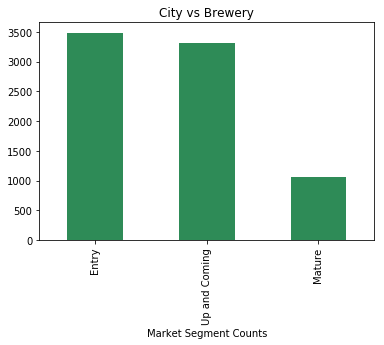

In [29]:
# Configure plot and ticks
market_data.plot(kind="bar", x="Market Segment Counts", y="Number of Breweries in City", title = "City vs Brewery", color="seagreen")

# Set textual properties
#plt.title("Number of Breweries by City")
#plt.ylabel("Number of Breweries")
#plt.xlabel("City")

# Show plot
plt.savefig("Output/market_data_bar.png", index=False, header=True)

plt.show(10)
#plt.tight_layout()

In [30]:
sort_by_population = total_brewery_info_final.sort_values(['Population'], ascending = False)
sort_by_population.to_csv("Output/sort_by_population.csv", index=False, header=True)
sort_by_market

,city,Population,Household Income,Median Age,Number of Breweries in City,Market Segment Counts
2089,Portland,24340.783019,51154.094340,35.798113,106,Mature
692,Denver,26995.641304,48279.967391,32.818478,92,Mature
2291,San Diego,36010.263736,71556.021978,33.656044,91,Mature
2355,Seattle,27708.465753,61992.109589,35.864384,73,Mature
514,Chicago,55823.584615,61812.784615,32.886154,65,Mature
126,Austin,30107.666667,60250.314815,33.579630,54,Mature
2294,San Francisco,36714.820513,82956.897436,37.574359,39,Mature
1668,Minneapolis,20071.131579,51655.447368,32.831579,38,Mature
580,Columbus,24985.555556,45719.138889,32.780556,36,Mature
1240,Indianapolis,24242.500000,44772.705882,34.447059,34,Mature


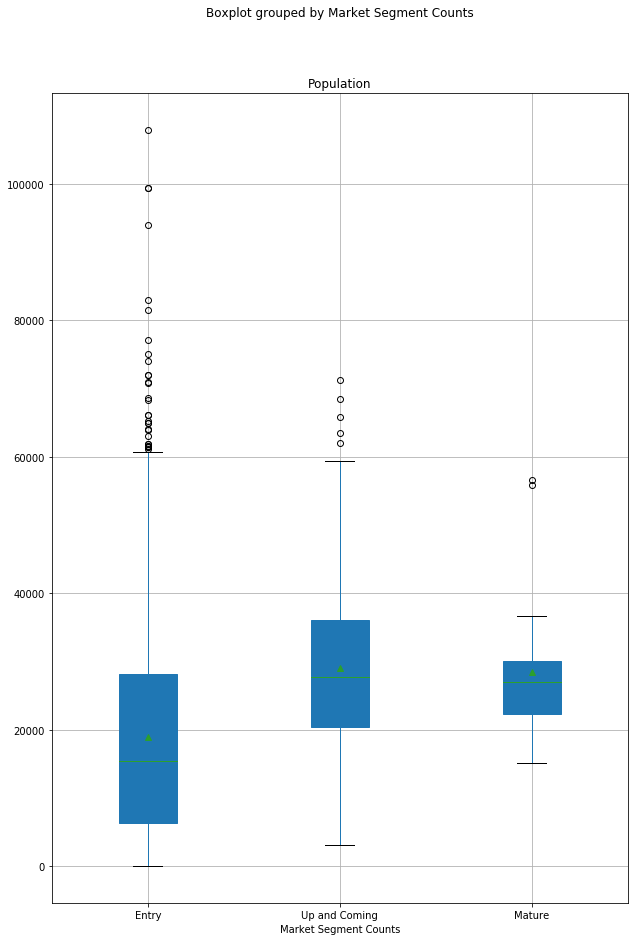

In [31]:
# Create a boxplot to compare means
total_brewery_info_final.boxplot("Population", by="Market Segment Counts", figsize=(10, 15), showmeans=True, patch_artist=True)

plt.savefig("Output/population_boxplot.png")

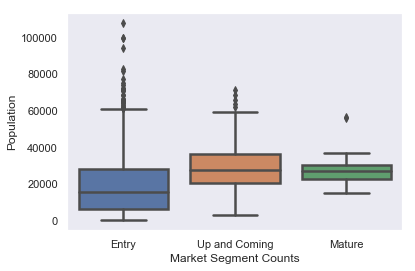

In [32]:
sns.set(style="dark")
ax = sns.boxplot(x="Market Segment Counts",y="Population", data=total_brewery_info_final, linewidth=2.5)
fig = ax.get_figure()
fig.savefig("Output/population_boxplot_updated")

In [33]:
#sort by median age
sort_market_age = total_brewery_info_final.sort_values(['Median Age'], ascending = False)
sort_market_age.to_csv("Output/sort_by_age.csv", index=False, header=True)
sort_market_age

,city,Population,Household Income,Median Age,Number of Breweries in City,Market Segment Counts
228,Big Flat,199.000000,14337.000000,73.300000,1,Entry
1949,Pacific City,696.000000,28269.000000,67.600000,1,Entry
1633,Middle Bass Island,135.000000,61250.000000,66.200000,1,Entry
2116,Punta Gorda,19723.000000,51136.000000,64.700000,1,Entry
824,Embudo,415.000000,19881.000000,63.200000,1,Entry
1957,Palm Desert,23729.000000,56737.000000,62.400000,1,Entry
1924,Orleans,5982.000000,59938.000000,62.200000,1,Entry
1615,Menifee,19091.000000,35935.000000,62.200000,1,Entry
168,Beach Haven,6926.000000,73094.000000,61.500000,1,Entry
1989,Peconic,262.000000,83000.000000,61.300000,1,Entry


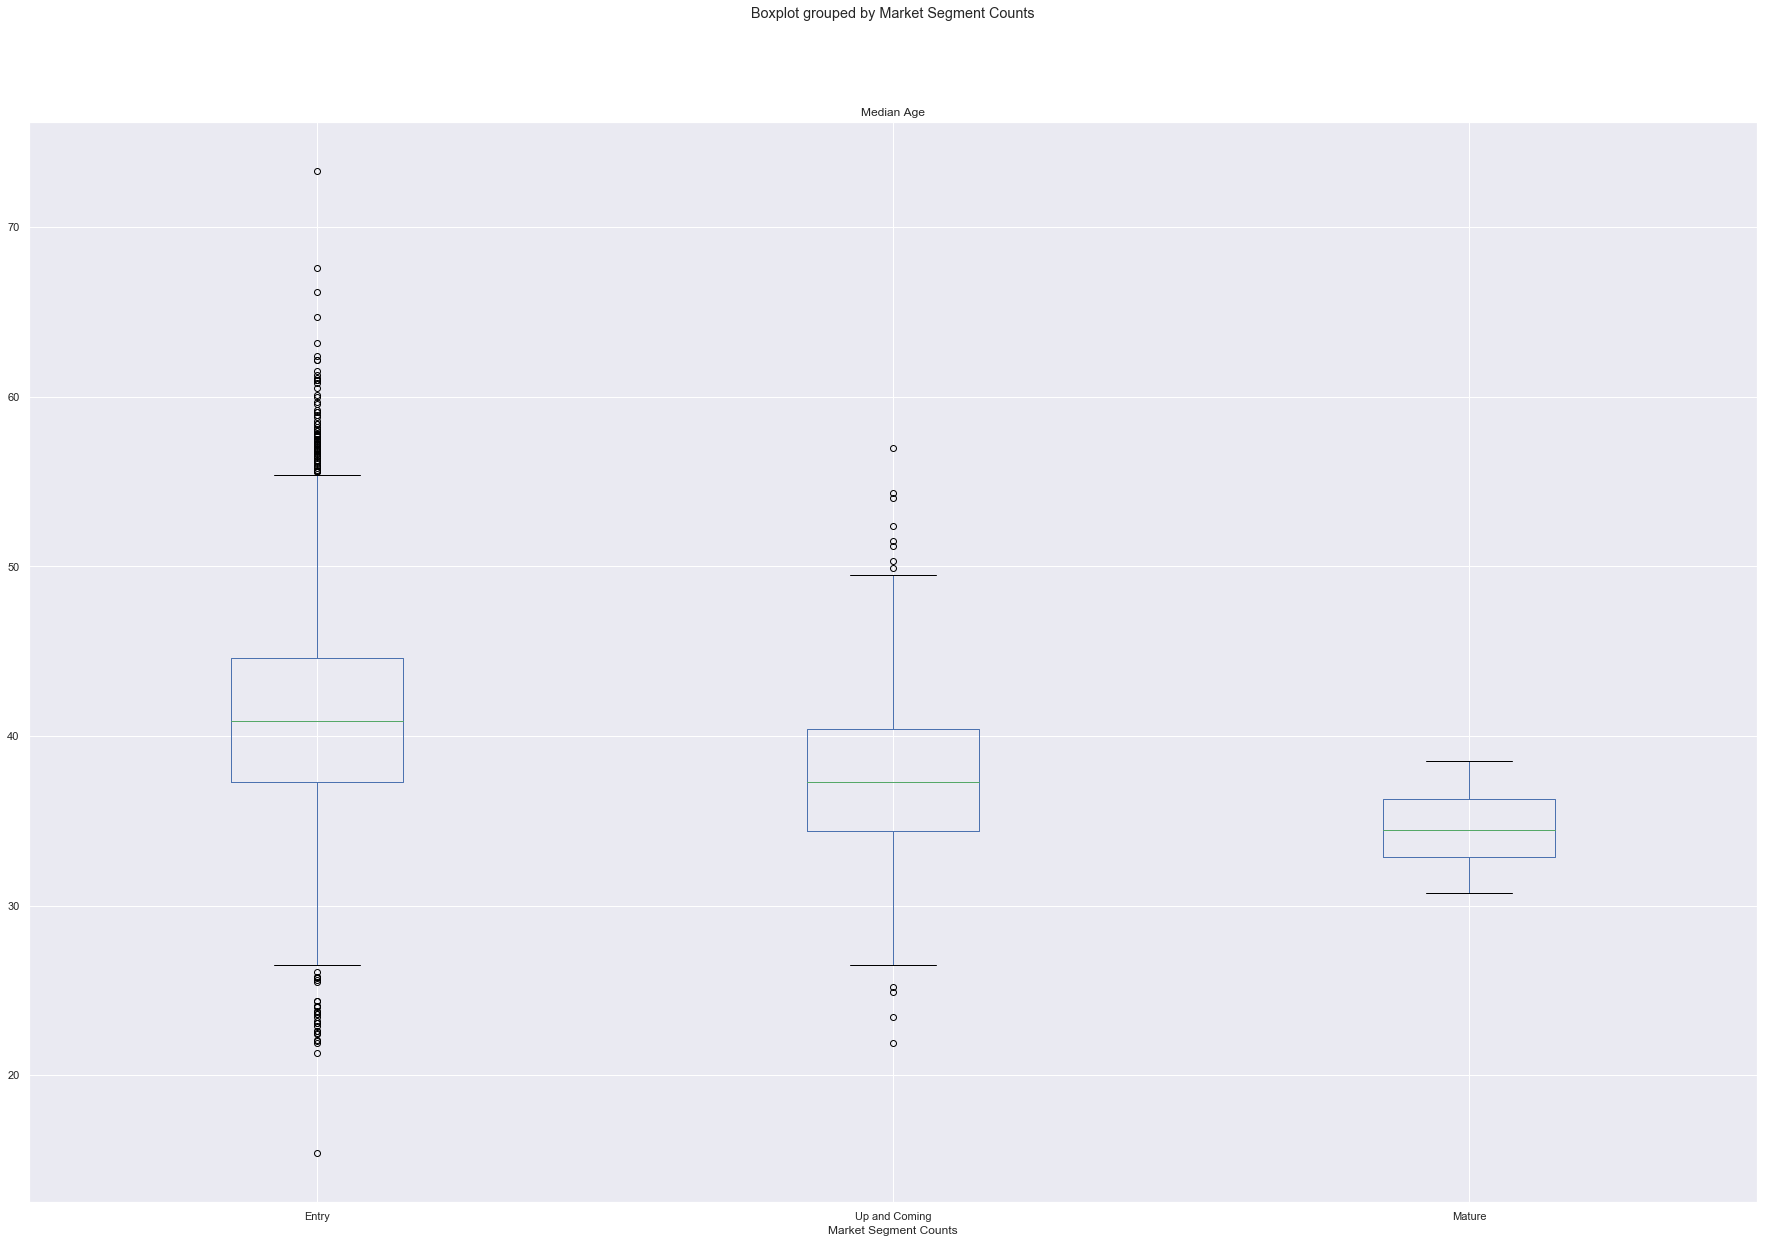

In [34]:
# Create a boxplot to compare age and market segments
total_brewery_info_final.boxplot("Median Age", by="Market Segment Counts", figsize=(30, 20))
plt.savefig("Output/median_age_boxplot.png")

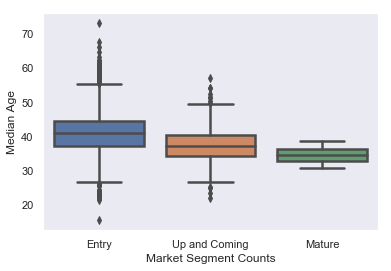

In [35]:
sns.set(style="dark")
ax = sns.boxplot(x="Market Segment Counts",y="Median Age", data=total_brewery_info_final, linewidth=2.5)
fig = ax.get_figure()
fig.savefig("Output/median_age_boxplot_updated")

In [36]:
#sort by Household Income

sort_household = total_brewery_info_final.sort_values(['Household Income'], ascending = False)
sort_household.to_csv("Output/sort_household.csv", index=False, header=True)
sort_household

,city,Population,Household Income,Median Age,Number of Breweries in City,Market Segment Counts
1017,Government Camp,139.000000,250001.000000,59.700000,1,Entry
2508,Still River,398.000000,181810.000000,42.300000,1,Entry
1591,Mc Lean,26258.000000,146483.500000,42.700000,2,Entry
278,Bolton,4967.000000,146029.000000,43.100000,2,Entry
1994,Pennington,13312.000000,144250.000000,44.100000,1,Entry
724,Dowell,219.000000,143523.000000,57.800000,1,Entry
2285,Sammamish,21408.000000,142926.000000,37.300000,1,Entry
2610,Trabuco Canyon,33377.000000,142803.000000,39.800000,1,Entry
220,Bethesda,32087.000000,142435.000000,42.050000,2,Entry
1409,Laytonsville,14157.000000,141648.000000,44.200000,1,Entry


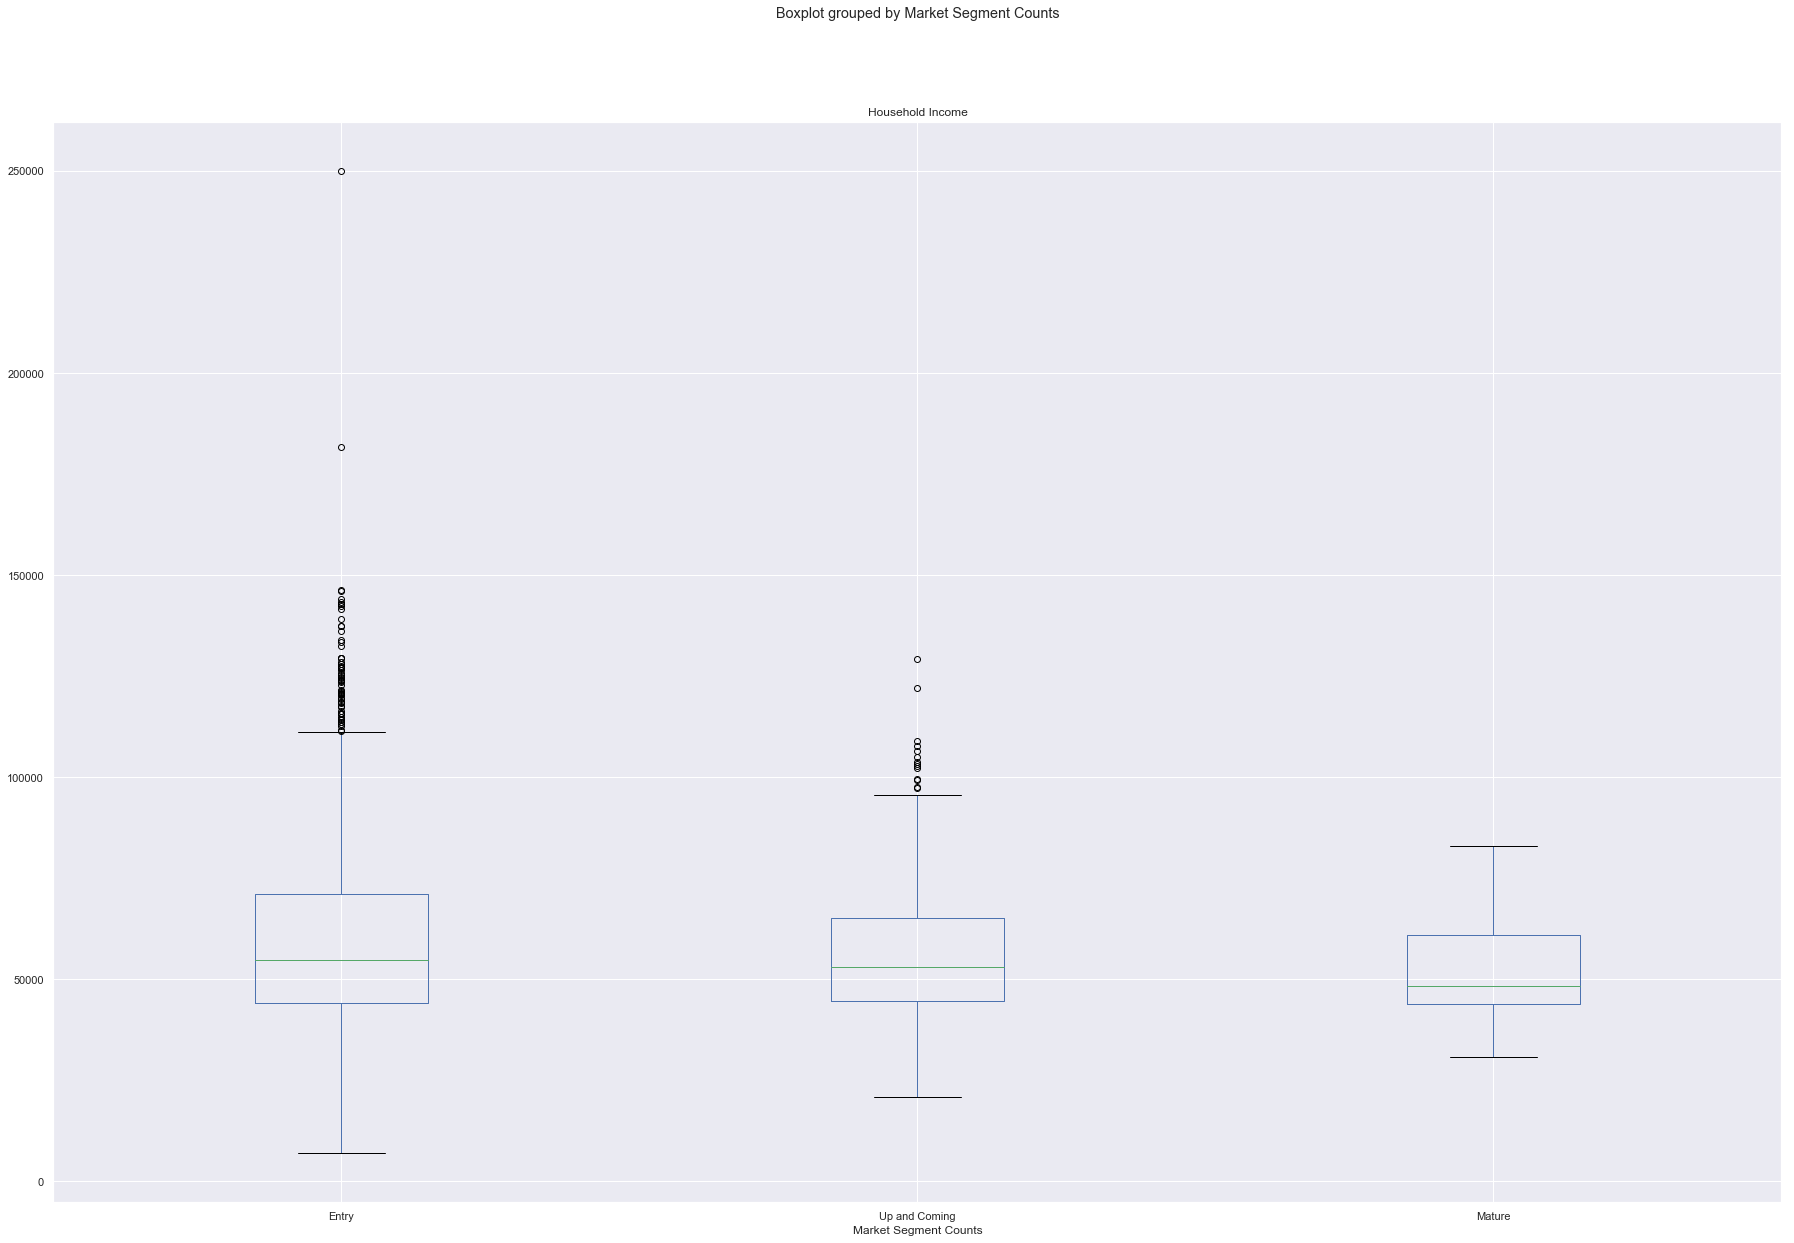

In [37]:
# Create a boxplot to compare income and market segments
total_brewery_info_final.boxplot("Household Income", by="Market Segment Counts", figsize=(30, 20))
plt.savefig("Output/household_income_boxplot.png")

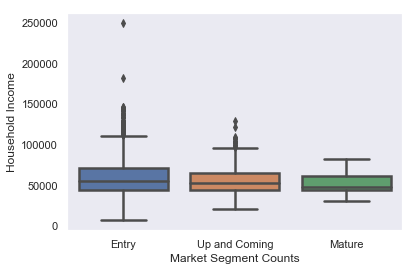

In [38]:
sns.set(style="dark")
ax = sns.boxplot(x="Market Segment Counts",y="Household Income", data=total_brewery_info_final, linewidth=2.5)
fig = ax.get_figure()
fig.savefig("Output/household_income_boxplot_updated")

In [39]:
# Merge two dataframes using an inner join
total_brewery_info_final = pd.merge(city_population, number_breweries, on="city")
total_brewery_info_round = total_brewery_info_final.rename(columns={"postal_code":"Number of Breweries in City"})
total_brewery_info_round = total_brewery_info_df.reset_index()
total_brewery_info_round.to_csv("Output/total_brewery_info_df.csv", index=False, header=True)
total_brewery_info_round["Median Age"] = total_brewery_info_round["Median Age"].map("{:,.2f}".format)
total_brewery_info_round["Population"] = total_brewery_info_round["Population"].map("{:,}".format)
total_brewery_info_round["Household Income"] = total_brewery_info_round["Household Income"].map("{:,.2f}".format)
total_brewery_info_round

,city,Population,Household Income,Median Age,Number of Breweries in City
0,Abbottstown,"3,501.0","61,607.00",40.70,1
1,Aberdeen,"24,299.0","45,182.25",37.92,4
2,Abilene,"25,049.5","44,612.75",33.00,4
3,Abingdon,"16,239.0","39,229.00",44.70,1
4,Abington,"16,009.0","78,395.00",38.70,1
5,Accord,"3,435.0","67,639.00",42.60,1
6,Acton,"21,804.0","109,578.00",41.90,2
7,Ada,"19,366.0","118,761.00",39.30,1
8,Adamstown,"2,902.5","73,526.50",40.85,2
9,Addison,"13,214.0","57,633.00",32.20,2


In [55]:
# Create a subset of the brewery_data_df called brewery_locacation_df that drops those rows that have NaN entries for 'latitude' and 'longitude' - this should reduce the inital list to 4,737
# Follow-up work will go back and get the LAT and LON for those missing locations after getting this inital list of 4,737 to plot in gmaps
brewery_location_df = brewery_data_df.dropna(subset=['latitude', 'longitude'])
brewery_location_df

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,tag_list,updated_at,website_url
0,micro,Birmingham,United States,2,33.524521,-86.774322,Avondale Brewing Co,2057775456,35222,Alabama,201 41st St S,[],2018-08-23T23:19:57.825Z,http://www.avondalebrewing.com
1,micro,Tuscaloosa,United States,4,33.198491,-87.562155,Band of Brothers Brewing Company,2052665137,35401,Alabama,1605 23rd Ave,[],2018-08-23T23:19:59.462Z,http://www.bandofbrosbrewing.com
2,micro,Birmingham,United States,44,33.512849,-86.791400,Trim Tab Brewing,2057030536,35233,Alabama,2721 5th Ave S,[],2018-08-23T23:20:31.423Z,http://www.trimtabbrewing.com
3,micro,Huntsville,United States,46,34.727752,-86.593201,Yellowhammer Brewery,2569755950,35805,Alabama,2600 Clinton Ave W,[],2018-08-23T23:20:33.102Z,http://www.yellowhammerbrewery.com
4,micro,Wasilla,United States,55,61.575269,-149.412710,Bearpaw River Brewing Co,,99654,Alaska,4605 E Palmer Wasilla Hwy,[],2018-08-23T23:20:40.743Z,http://bearpawriverbrewing.com
5,micro,Anchorage,United States,76,61.138489,-149.879076,King Street Brewing Co,9073365464,99515,Alaska,9050 King Street,[],2018-08-23T23:20:57.179Z,http://www.kingstreetbrewing.com
6,micro,Tucson,United States,94,32.246737,-110.992751,1912 Brewing,5202564851,85745,Arizona,2045 N Forbes Blvd Ste 105,[],2018-08-23T23:21:11.302Z,http://www.1912brewing.com
7,contract,Scottsdale,United States,98,33.497262,-111.924474,Bad Water Brewing,5207459175,85251,Arizona,4216 N Brown Ave,[],2018-08-23T23:21:15.169Z,http://www.badwaterbrewing.com
8,brewpub,Chandler,United States,104,33.305346,-111.911126,BJs Restaurant & Brewery - Chandler,4809170631,85226,Arizona,3155 W Chandler Blvd,[],2018-08-23T23:21:21.165Z,http://www.bjsrestaurants.com
9,micro,Tucson,United States,107,32.201608,-110.821779,BlackRock Brewers,5202073203,85710,Arizona,1664 S Research Loop Ste 200,[],2018-08-23T23:21:23.794Z,http://www.brb.beer


In [59]:
# Use the existing brewery latitude and longitude to create a heatmap using gmaps
# note gmaps has three possible views, the default is a "TERRAN" but "SATELLITE" or  "HYBRID"
locations = brewery_location_df[['latitude', 'longitude']]

fig = gmaps.figure(map_type='HYBRID')

heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
#embed_minimal_html("export.html",views=[fig])
#fig.savefig("Output/heatmap.png")
print(fig)

Figure(layout=FigureLayout(height='420px'))


In [42]:
# list the brewery counts by city using count of postal_codes
breweries_by_state_city_df = brewery_data_df.groupby(['state', 'city'])[['postal_code']].count()
# Sort by state and then city in decending order
breweries_by_state_city_df.sort_values(by='postal_code',ascending=False)

,,postal_code
state,city,
Colorado,Denver,93
California,San Diego,91
Oregon,Portland,86
Washington,Seattle,73
Illinois,Chicago,65
Texas,Austin,54
California,San Francisco,39
Minnesota,Minneapolis,38
Ohio,Cincinnati,35
